In [1]:
from my_cluster import myCluster, get_centroids
from sklearn.datasets import load_iris, load_wine, load_digits, load_breast_cancer
import numpy as np

In [2]:
n_points = 2000

# Parameters for cluster 1
mean_local_1 = [50, 0]
covariance_local_1 = np.array([[100, 90], [90, 100]])  # Swap off-diagonal elements

# Parameters for cluster 2
mean_local_2 = [200, -50]
covariance_local_2 = np.array([[100, -90], [-90, 100]])  # Swap off-diagonal elements

# Parameters for cluster 3
mean_local_3 = [100, 150]
covariance_local_3 = np.array([[1, 0], [0, 100]])  # Set off-diagonal element to 0

# Generate samples for each cluster
x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_noise_3, y_noise_3 = np.random.multivariate_normal(mean_local_3, covariance_local_3, n_points).T

# Concatenate the data points
x_local = np.concatenate([x_noise_1, x_noise_2, x_noise_3])
y_local = np.concatenate([y_noise_1, y_noise_2, y_noise_3])

X_0 = np.hstack((x_local[:, np.newaxis], y_local[:, np.newaxis]))

In [2]:
iris = load_iris()
X_1 = iris.data

In [4]:
wine = load_wine()
X_2 = wine.data

In [2]:
digits = load_digits()
X_3 = digits.data

In [2]:
cancer = load_breast_cancer()
X_4 = cancer.data

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# I do the scaler fitting on the training data only
#on the training test I do fit and transform simultaneously
DATA = scaler.fit_transform(X_2)

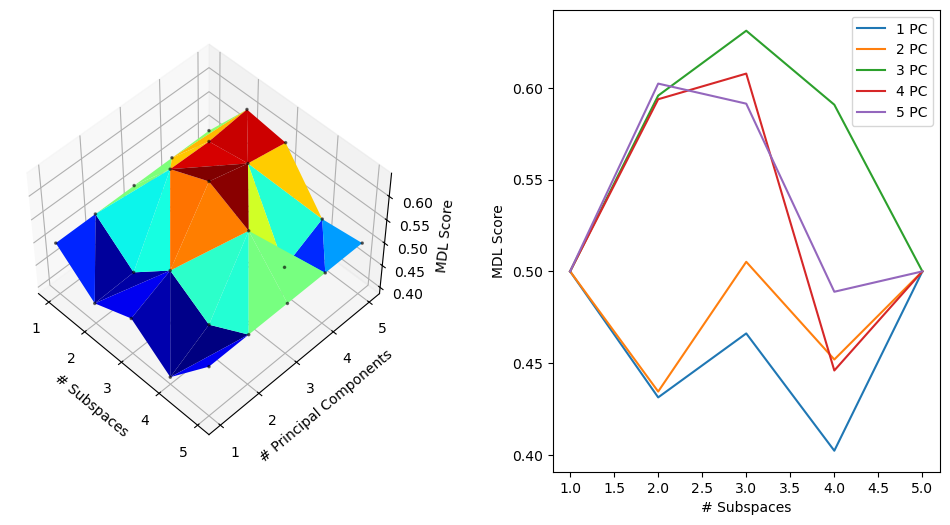

In [12]:
model = myCluster.search_best_cluster(DATA, 5, 5)

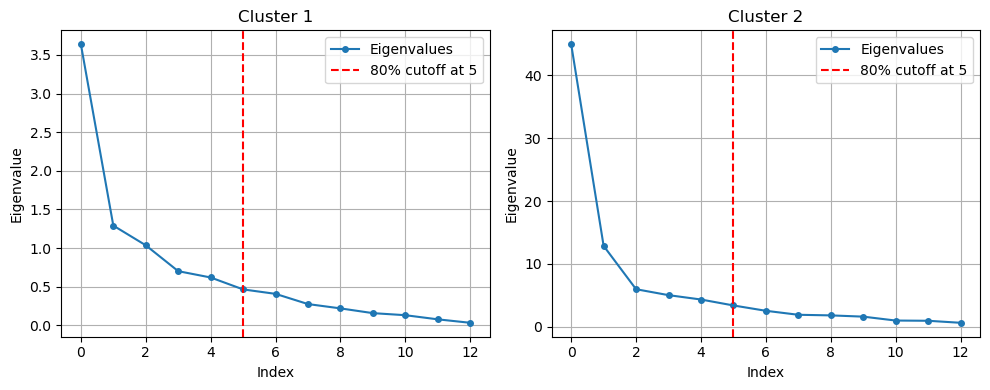

None


In [14]:
print(model.plot_elbow_plots_with_cutoff(2, 2))

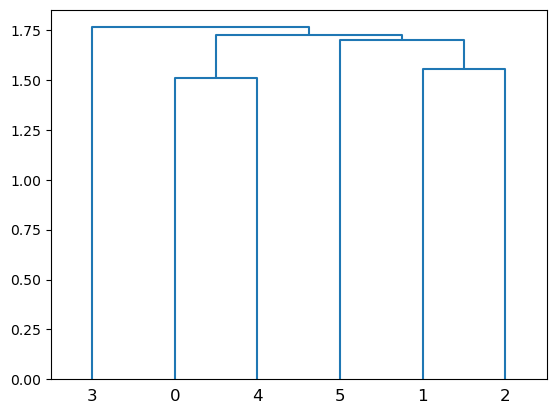

In [9]:
model.plot_dendrogram(truncate_mode="level", p=3)

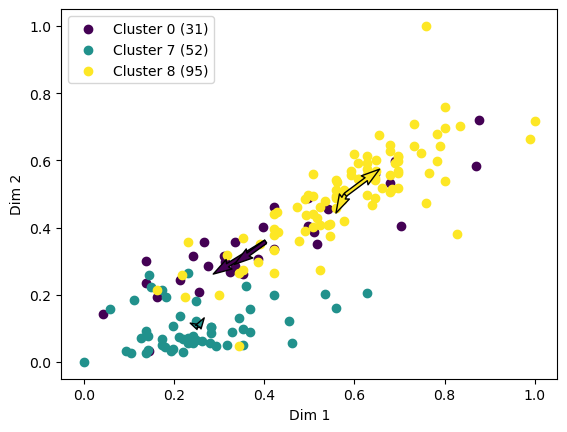

In [21]:
model.plot_2d_scatter(5,6,0,7,8, vectors=True)

In [19]:
print(model.mdl_info())

MDL for compression hierarchy
----------------
[0, 1, 2, 3, 4, 5]-->0.5
[0, 1, 2, 5, 6]   -->0.48321951990376927
[0, 2, 6, 7]      -->0.45682802301228437
[0, 7, 8]         -->0.3787877706609392
[0, 9]            -->0.4395269163608337
[10]               -->0.5
None


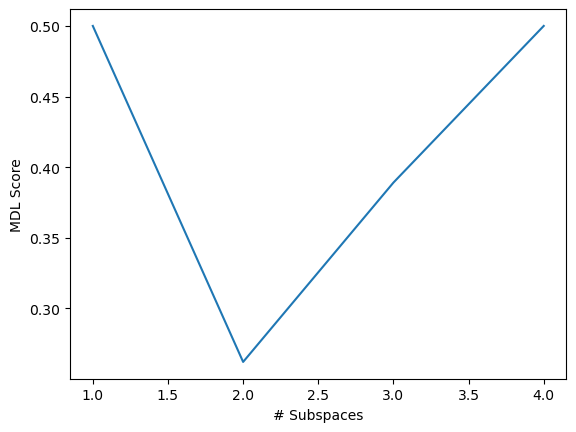

In [11]:
model.plot_mdl_stats()